In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np


# Working with SQlite Databases using Python and Pandas


<!-- PELICAN_BEGIN_SUMMARY -->

SQLite is a database engine that makes it simple to store and work with relational data.
Much like the csv format, SQLite stores data in a single file that can be easily shared with others.
Most programming languages and environments have good support for working with SQLite databases.

This example file is "life expectancy and birth rate by country" from data.gov.
The file is in Excel format.

The maximum number of data series per chart in Excel is 255, so using Python to chart a hugh dataset is very useful.

<!-- PELICAN_END_SUMMARY -->


## Using Python to Import Excel to SQLite and Perform Financial Analysis 
- Import Excel to SQLite database 
- View SQLite database after reading from Excel and Set index
- Join Tables and Query Data in Python 
- Reading results into a pandas DataFrame
- Create query result table in SQLite and Excel
- Creating and altering tables with pandas
- Modifying primary key in SQLite or in Python
- Visualize life expectancy comparison between US and Japan from 1960 to 2015

### Import Excel to SQLite Database
- Connect SQlite file
- Changes make in Excel, will automatically update in SQLite after reconnect
- This is very helpful, no save and reopen Excel file

In [113]:
filename="data/Life" 
con=sqlite3.connect(filename+".db")  

wb=pd.read_excel(filename+'.xlsx',sheet_name=None)
for sheet in wb:
    wb[sheet].to_sql(sheet,con, index=False, if_exists='replace')
    
con.commit()
#con.close()


C:\apps\python36\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


### View SQLite database after reading from Excel and Set index
- set primary key in SQLite
- we can read the file in Excel, but can't set the primary key

In [114]:
# read the first table "LifeExpectancy" and set the primary key to "CountryName"
df_life_expectancy = pd.read_sql('select * from LifeExpectancy', con, index_col="CountryName")
df_life_expectancy.head() 

,CountryCode,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,Year_1968,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.338829,74.482756,74.627683,74.771146,74.910634,75.047659,75.183195,75.319732,75.456780,75.594341
Afghanistan,AFG,32.337561,32.786976,33.228927,33.666902,34.101902,34.534902,34.966927,35.398927,35.832415,...,59.125951,59.708854,60.256732,60.764610,61.235463,61.674244,62.092976,62.501610,62.902683,63.298195
Angola,AGO,33.226024,33.547756,33.888000,34.244732,34.617463,35.002220,35.396512,35.797854,36.202268,...,53.927122,55.047512,56.139293,57.181000,58.141122,58.991244,59.718439,60.321756,60.806732,61.189341
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.561244,75.794927,76.072659,76.394878,76.747902,77.108463,77.448268,77.747098,77.998390,78.203146
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# read the second table "Population" and set the primary key to "CountryName"
df_population = pd.read_sql('select * from Population', con, index_col="CountryName")
df_population.head()

,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000 births,GDP_ per_capita,Literacy,Birthrate,Deathrate,Agriculture,Industry,Service
CountryName,,,,,,,,,,,,,
Aruba,31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,46.60,20.34,0.380,0.240,0.380
Afghanistan,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,15.11,5.22,0.232,0.188,0.579
Angola,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,17.14,4.61,0.101,0.600,0.298
Albania,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
### Join Tables and Query Data in Python
### Reading results into a pandas DataFrame
- we can join table to do a query and save the result to a third table or save as Excel format

In [9]:
# lets issue a SQL statment

sql_statement='''
select l.CountryName, l.year_1970, p.Birthrate
from LifeExpectancy as l
join Population as p on p.CountryName=l.CountryName;
'''

df_results = pd.read_sql(sql_statement, con, index_col="CountryName")
df_results.head() 

,Year_1960,Birthrate
CountryName,,
Aruba,65.569366,46.60
Afghanistan,32.337561,15.11
Angola,33.226024,17.14
Albania,62.254366,22.46
Andorra,NaN,8.71


### Create query result table in SQLite and Excel
### Creating and altering tables with Pandas 

In [10]:
# we can create a new table for our query result and add it to the existing Life.db
df_results.to_sql("pop_life_expectancy",con, index="CountryName", if_exists='replace')
con.commit()
#con.close()


## Here is table view from DB Browser

<img src="/images/LifeNewTable.png" alt="[img: DB Browser after creating new query result to a table]" title="DbBrowser Query" />

# Visualize the data to compare US and Japan life Expectany from 1960 to 2015
- after initial data analysis, sometime we need to reshape the data for further analaysis
- we can reshape the data format to set index for visualization
- The maximum number of data series per chart in Excel is 255, this data has 264 columns as data series


In [115]:
dfr = pd.read_excel('data/LifeChart.xlsx')
year = dfr['Date']
country = dfr.loc[:,'Aruba':'Zimbabwe']  #how to select US and Japan only???? 5/24/18
print (country[0:2])

       Aruba  Afghanistan     Angola    Albania  Andorra  Arab World  \
0  65.569366    32.337561  33.226024  62.254366      NaN   46.815045   
1  65.988024    32.786976  33.547756  63.273463      NaN   47.397232   

   United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
0             52.288707  65.215537  65.863463             NaN    ...       
1             53.334049  65.338512  66.284390             NaN    ...       

   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  Kosovo  \
0              66.224854  59.067024  46.487488  52.585685  49.969512     NaN   
1              66.487976  59.744195  47.088098  53.089030  50.469512     NaN   

   Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0    34.363805     52.226244  45.109805  51.541976  
1    34.473244     52.568732  45.487512  51.914951  

[2 rows x 264 columns]


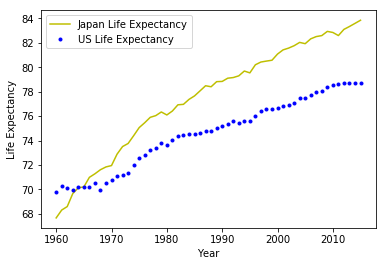

In [110]:
# Compare Japan and US life Expectancy from 1960 to 2015 and save the chart as png file, then use the chart for analysis or presentation
# It's effective to chart the dataset when dealing with hugh dataset more than Excel limite 255 data series
plt.figure(1)
plt.plot(year, country['Japan'], 'y-')
plt.plot(year, country['United_States'], 'b.')
plt.legend(['Japan Life Expectancy','US Life Expectancy'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('data/JapanLifeExpectancy.png')

In [111]:
# set index to Date
dfr.set_index('Date', inplace=True)
dfr.head()

,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1960,65.569366,32.337561,33.226024,62.254366,NaN,46.815045,52.288707,65.215537,65.863463,NaN,...,66.224854,59.067024,46.487488,52.585685,49.969512,NaN,34.363805,52.226244,45.109805,51.541976
1961,65.988024,32.786976,33.547756,63.273463,NaN,47.397232,53.334049,65.338512,66.284390,NaN,...,66.487976,59.744195,47.088098,53.089030,50.469512,NaN,34.473244,52.568732,45.487512,51.914951
1962,66.365537,33.228927,33.888000,64.162854,NaN,47.977768,54.376488,65.432610,66.709854,NaN,...,66.741098,60.410537,47.688195,53.510894,50.969512,NaN,34.739561,52.901341,45.853659,52.277902
1963,66.713976,33.666902,34.244732,64.887098,NaN,48.560874,55.415000,65.509390,67.137854,NaN,...,66.996220,61.043024,48.287293,54.041987,51.469512,NaN,35.186780,53.234049,46.209220,52.629317
1964,67.044293,34.101902,34.617463,65.438195,NaN,49.147395,56.446073,65.582415,67.565415,NaN,...,67.260366,61.607146,48.886829,54.718962,51.969512,NaN,35.812878,53.573659,46.558683,52.971659
